<a href="https://www.kaggle.com/code/thirumani/nenu-super-women-analysis?scriptVersionId=138330709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:yellow;color:black;font-size:120%;text-align:center;border-radius:10px 10px;font-weight:bold;border:0px solid #800080;">Aha's Nenu Super Women Exploratory Data Analysis (EDA)</p>
## Dataset https://www.kaggle.com/datasets/thirumani/nenu-super-women-in-aha

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on 2023-Jul-30 with Python version
Python 3.10.12


## ⚒️ Importing Required Python Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [3]:
! ls -l /kaggle/input/nenu-super-women-in-aha
nenu_super_women = pd.read_csv('/kaggle/input/nenu-super-women-in-aha/Nenu Super Women.csv', encoding = "ISO-8859-1")
 
nRow, nCol = nenu_super_women.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 4
-rw-r--r-- 1 nobody nogroup 2553 Jul 30 05:37 'Nenu Super Women.csv'

There are 8 rows and 54 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [4]:
nenu_super_women.head(5)

Season Number Season Start  Season End  Episode Number  Pitch Number  \
0              1    21-Jul-23         NaN               1             1   
1              1    21-Jul-23         NaN               1             2   
2              1    21-Jul-23         NaN               2             3   
3              1    21-Jul-23         NaN               2             4   
4              1    21-Jul-23         NaN               3             5   

    Startup Name             Industry               Business Description  \
0      Ammamma's                 Food           Ready to eat packed food   
1          Vapra       Lifestyle/Home                   Waste composters   
2       CocoTang                 Food                Coconut based drink   
3        Zithara  Software/Technology    Customer segmentation in retail   
4  ForwardParcel            Logistics  International shipping from India   

               Company Website  Entrepreneur Names  Number of Presenters  \
0     https://www.ammammas.in/  Prathima Viswanath                     1   
1  https://vapracomposting.in/              Pavani                     1   
2   https://cocotangindia.com/             Neelima                     1   
3         https://zithara.com/             Sridevi                     1   
4        www.ForwardParcel.com    Chetana Priyanka                     1   

  Pitchers Average Age  Started in  Yearly Revenue  Monthly Sales  \
0               Middle      2019.0          4200.0            NaN   
1                Young      2020.0             NaN            3.0   
2               Middle      2020.0             NaN            NaN   
3               Middle      2022.0             NaN            NaN   
4               Middle      2019.0           130.0            NaN   

   Gross Margin  Net Margin  SKUs  Original Ask Amount  \
0          55.0         NaN  21.0                  300   
1           NaN         NaN   4.0                   25   
2           NaN         NaN   6.0                   50   
3           NaN         NaN   NaN                   80   
4          35.0        30.0   NaN                   50   

   Original Offered Equity  Valuation Requested  Received Offer  \
0                        6                 5000               1   
1                       10                  250               1   
2                        5                 1000               0   
3                        2                 4000               1   
4                        5                 1000               0   

   Accepted Offer  Total Deal Amount  Total Deal Equity  ...  \
0             1.0               50.0                2.0  ...   
1             1.0               25.0               20.0  ...   
2             NaN                NaN                NaN  ...   
3             1.0               60.0                6.0  ...   
4             NaN                NaN                NaN  ...   

   Investment Amount Per Angel  Equity Per Angel  Deal has conditions  \
0                         25.0               1.0                  NaN   
1                         12.5              10.0                  NaN   
2                          NaN               NaN                  NaN   
3                         10.0               1.0                  NaN   
4                          NaN               NaN                  NaN   

   Has Patents  Deepa Investment Amount  Deepa Investment Equity  \
0          NaN                     25.0                      1.0   
1          NaN                      NaN                      NaN   
2          NaN                      NaN                      NaN   
3          NaN                     10.0                      1.0   
4          NaN                      NaN                      NaN   

  Deepa Debt Amount  Renuka Investment Amount  Renuka Investment Equity  \
0               NaN                       NaN                       NaN   
1               NaN                       NaN                       NaN   
2            

In [5]:
nenu_super_women.tail(4).T

4  \
Season Number                                                1   
Season Start                                         21-Jul-23   
Season End                                                 NaN   
Episode Number                                               3   
Pitch Number                                                 5   
Startup Name                                     ForwardParcel   
Industry                                             Logistics   
Business Description         International shipping from India   
Company Website                          www.ForwardParcel.com   
Entrepreneur Names                            Chetana Priyanka   
Number of Presenters                                         1   
Pitchers Average Age                                    Middle   
Started in                                              2019.0   
Yearly Revenue                                           130.0   
Monthly Sales                                              NaN   
Gross Margin                                              35.0   
Net Margin                                                30.0   
SKUs                                                       NaN   
Original Ask Amount                                         50   
Original Offered Equity                                      5   
Valuation Requested                                       1000   
Received Offer                                               0   
Accepted Offer                                             NaN   
Total Deal Amount                                          NaN   
Total Deal Equity                                          NaN   
Total Deal Debt                                            NaN   
Debt Interest                                              NaN   
Deal Valuation                                             NaN   
Number of Angels in deal                                   NaN   
Investment Amount Per Angel                                NaN   
Equity Per Angel                                           NaN   
Deal has conditions                                        NaN   
Has Patents                                                NaN   
Deepa Investment Amount                                    NaN   
Deepa Investment Equity                                    NaN   
Deepa Debt Amount                                          NaN   
Renuka Investment Amount                                   NaN   
Renuka Investment Equity                                   NaN   
Renuka Debt Amount                                         NaN   
Sridhar Investment Amount                                  NaN   
Sridhar Investment Equity                                  NaN   
Sridhar Debt Amount                                        NaN   
Rohit Investment Amount                                    NaN   
Rohit Investment Equity                                    NaN   
Rohit Debt Amount                                          NaN   
Sindhura Investment Amount                                 NaN   
Sindhura Investment Equity                                 NaN   
Sindhura Debt Amount                                       NaN   
Sudhakar Investment Amount                                 NaN   
Sudhakar Investment Equity                                 NaN   
Sudhakar Debt Amount                                       NaN   
Karan Investment Amount                                    NaN   
Karan Investment Equity                                    NaN   
Karan Debt Amount                                          NaN   

                                                              5  \
Season Number                                                 1   
Season Start                                          21-Jul-23   
Season End                                                  NaN   
Episode Number                                                3   
Pitch Number                                                  6   
Startup Name                

In [6]:
nenu_super_women['Season Number'] = nenu_super_women['Season Number'].astype(pd.Int32Dtype())
nenu_super_women['Episode Number'] = nenu_super_women['Episode Number'].astype(pd.Int32Dtype())
nenu_super_women['Pitch Number'] = nenu_super_women['Pitch Number'].astype(pd.Int32Dtype())

nenu_super_women['Gross Margin'] = nenu_super_women['Gross Margin'].astype(pd.Int32Dtype())
nenu_super_women['Net Margin'] = nenu_super_women['Net Margin'].astype(pd.Int32Dtype())

nenu_super_women['Started in'] = nenu_super_women['Started in'].astype(pd.Int32Dtype())
nenu_super_women['Yearly Revenue'] = nenu_super_women['Yearly Revenue'].astype(pd.Int32Dtype())

nenu_super_women['Received Offer'] = nenu_super_women['Received Offer'].astype(pd.Int32Dtype())
nenu_super_women['Accepted Offer'] = nenu_super_women['Accepted Offer'].astype(pd.Int32Dtype())

In [7]:
nenu_super_women.sample(3).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [8]:
nenu_super_women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Season Number                8 non-null      Int32  
 1   Season Start                 8 non-null      object 
 2   Season End                   0 non-null      float64
 3   Episode Number               8 non-null      Int32  
 4   Pitch Number                 8 non-null      Int32  
 5   Startup Name                 8 non-null      object 
 6   Industry                     8 non-null      object 
 7   Business Description         8 non-null      object 
 8   Company Website              7 non-null      object 
 9   Entrepreneur Names           8 non-null      object 
 10  Number of Presenters         8 non-null      int64  
 11  Pitchers Average Age         8 non-null      object 
 12  Started in                   7 non-null      Int32  
 13  Yearly Revenue          

In [9]:
nenu_super_women.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [10]:
# Unique values in each column
for col in nenu_super_women.columns:
    print("Number of unique values in", col, "-", nenu_super_women[col].nunique())

Number of unique values in Season Number - 1
Number of unique values in Season Start - 1
Number of unique values in Season End - 0
Number of unique values in Episode Number - 4
Number of unique values in Pitch Number - 8
Number of unique values in Startup Name - 8
Number of unique values in Industry - 6
Number of unique values in Business Description - 8
Number of unique values in Company Website - 7
Number of unique values in Entrepreneur Names - 8
Number of unique values in Number of Presenters - 1
Number of unique values in Pitchers Average Age - 2
Number of unique values in Started in - 4
Number of unique values in Yearly Revenue - 4
Number of unique values in Monthly Sales - 2
Number of unique values in Gross Margin - 2
Number of unique values in Net Margin - 1
Number of unique values in SKUs - 4
Number of unique values in Original Ask Amount - 5
Number of unique values in Original Offered Equity - 5
Number of unique values in Valuation Requested - 5
Number of unique values in Rec

## 🏦 Season 1 of "Nenu Super Women" was broadcasting in Aha Telugu OTT platform

In [11]:
# Data set information
print(nenu_super_women['Season Number'].max(), "season \n")
print(nenu_super_women['Pitch Number'].max(), "startup companies came for pitching \n")

1 season 

8 startup companies came for pitching 



In [12]:
# There were 2 pitches, in a each episode
print(nenu_super_women[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[2]


In [13]:
# Types of industries, came for investment
tmp = nenu_super_women['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Nenu Super Women - Industry wise startups</b>", template='simple_white', text=tmp, width=450, height=450)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [14]:
print("Total pitchers -", int(nenu_super_women['Number of Presenters'].sum()), "\n")

Total pitchers - 8 



Middle    6
Young     2
Name: Pitchers Average Age, dtype: int64 

Middle    75%
Young     25%
Name: Pitchers Average Age, dtype: object 



<Axes: title={'center': 'Pitchers Age wise percentage'}, ylabel='Pitchers Average Age'>

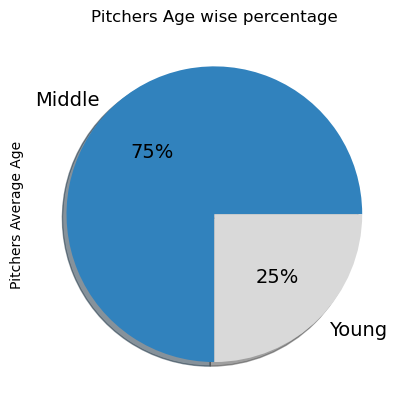

In [15]:
# Age wise
print(nenu_super_women['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(nenu_super_women['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
nenu_super_women["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)

### 💹 75% companies received offers and 25% startups could not convince Angels to invest

1    6
0    2
Name: Received Offer, dtype: Int64 

1    75%
0    25%
Name: Received Offer, dtype: object


<Axes: ylabel='Received Offer'>

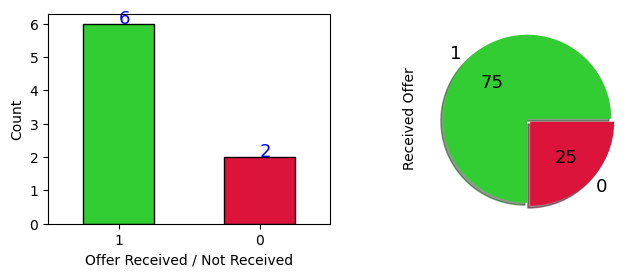

In [16]:
# Offers received
print(nenu_super_women['Received Offer'].value_counts(), "\n")
print(round(nenu_super_women['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (8,6))
ax1 = plt.subplot(221)
nenu_super_women["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received")
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(nenu_super_women["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
nenu_super_women["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# 6 companies received offers & 2 startups could not convince #Angels to invest.

In [17]:
# # Offers accepted
# print(nenu_super_women['Accepted Offer'].value_counts(), "\n")
# print(round(nenu_super_women['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

# plt.figure(figsize = (15, 9))
# ax1 = plt.subplot(221)
# nenu_super_women["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
# plt.xlabel("Offer Accepted / Rejected")
# plt.ylabel("Count")
# plt.xticks(rotation = 0)
# for x,y in enumerate(nenu_super_women["Accepted Offer"].value_counts()):
#     plt.annotate(y, (x,y), fontsize=13, color="blue")

# ax2 = plt.subplot(222)
# nenu_super_women["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)

# # 176 companies accepted investments they got & 40 #Startups did not accept Angel's offer.

In [18]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher - Rs.", round(nenu_super_women["Original Ask Amount"].max()/100), "crores")

Maximum amount requested, by a pitcher - Rs. 3 crores


In [19]:
# Least amount requested
print("Least amount requested, by a pitcher - Rs.", round(nenu_super_women["Original Ask Amount"].min()), "lakhs")

Least amount requested, by a pitcher - Rs. 25 lakhs


In [20]:
# Offers rejected by pitchers/startup companies
nenu_super_women.loc[nenu_super_women['Accepted Offer']==0, ["Season Number","Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Industry, Original Ask Amount, Original Offered Equity]
Index: []

In [21]:
# Sum of investment amount asked, in Nenu Super Women in Aha
print("Sum of investment amount asked, by all startup companies, in NenuSuperWomen in Aha -", format_currency(nenu_super_women['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Sum of investment amount asked, by all startup companies, in NenuSuperWomen in Aha - ₹7.35 crores


In [22]:
# Amount invested by all Angels, in Aha's Nenu Super Women
print("Amount invested by all Angels, in Nenu Super Women -", format_currency(nenu_super_women['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Amount invested by all Angels, in Nenu Super Women - ₹3 crores


In [23]:
# Sum of loan/debt amount, in Nenu Super Women
print("Sum of loan/debt amount, given by all Angels, in Nenu Super Women in Aha -", format_currency(nenu_super_women['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Sum of loan/debt amount, given by all Angels, in Nenu Super Women in Aha - ₹0 crores


In [24]:
# Top 5 investments, as per total investment/deal amount (in lakhs)
print(nenu_super_women.groupby('Startup Name')['Total Deal Amount'].max().nlargest(5))

tmpdf = nenu_super_women.sort_values('Total Deal Amount', ascending=False)[0:5]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'])
fig.show()

Startup Name
BiorasPharma          100.0
Zithara                60.0
Ammamma's              50.0
TummyFriendlyFoods     40.0
DoggyVille             25.0
Name: Total Deal Amount, dtype: float64


In [25]:
# Top 5 investments, as per total equity/shares percentage diluted
print(nenu_super_women.groupby('Startup Name')['Total Deal Equity'].max().nlargest(5))

tmpdf = nenu_super_women.sort_values('Total Deal Equity', ascending=False)[0:5]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Vapra                 20.0
DoggyVille            10.0
TummyFriendlyFoods     8.0
Zithara                6.0
Ammamma's              2.0
Name: Total Deal Equity, dtype: float64


In [26]:
# # Top 5 investments, as per total debt/loan amount
# print(nenu_super_women.groupby('Startup Name')['Total Deal Debt'].max().nlargest(5))

# tmpdf = nenu_super_women.sort_values('Total Deal Debt', ascending=False)[0:3]
# fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in lakhs)", text=tmpdf['Total Deal Debt'])
# fig.show()

In [27]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", nenu_super_women['Total Deal Debt'].count(),"\n")
nenu_super_women.loc[nenu_super_women['Total Deal Debt'] > 0][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Total Deal Debt"]]

Number of startups who got debt/loan amount 0 



Empty DataFrame
Columns: [Season Number, Startup Name, Original Ask Amount, Total Deal Amount, Total Deal Equity, Total Deal Debt]
Index: []

## 💰 Which Angel invested most ?

In [28]:
# Maximum Investment - as per Investment Amount
print("Maximum Investment - as per Investment Amount")
print("Sindhura invested -", round(max(nenu_super_women['Deepa Investment Amount'].sum()/100, nenu_super_women['Renuka Investment Amount'].sum()/100, nenu_super_women['Sridhar Investment Amount'].sum()/100, nenu_super_women['Rohit Investment Amount'].sum()/100,
    nenu_super_women['Sindhura Investment Amount'].sum()/100, nenu_super_women['Sudhakar Investment Amount'].sum()/100, nenu_super_women['Karan Investment Amount'].sum()/100),2), "crores")

Maximum Investment - as per Investment Amount
Sindhura invested - 0.72 crores


In [29]:
# Minimum Investment - as per Investment Amount
print("Minimum Investment - as per Investment Amount")
print("Karan invested -", round(min(nenu_super_women['Karan Investment Amount'].sum()/100, nenu_super_women['Renuka Investment Amount'].sum()/100, nenu_super_women['Sridhar Investment Amount'].sum()/100, nenu_super_women['Rohit Investment Amount'].sum()/100,
    nenu_super_women['Sindhura Investment Amount'].sum()/100, nenu_super_women['Sudhakar Investment Amount'].sum()/100, nenu_super_women['Karan Investment Amount'].sum()/100),2), "crores")

Minimum Investment - as per Investment Amount
Karan invested - 0.0 crores


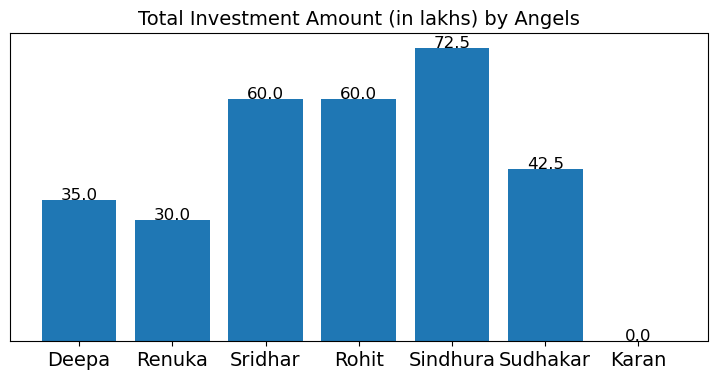

In [30]:
# Amount Invested by Angels
Amount = [nenu_super_women['Deepa Investment Amount'].sum(), nenu_super_women['Renuka Investment Amount'].sum(), nenu_super_women['Sridhar Investment Amount'].sum(), nenu_super_women['Rohit Investment Amount'].sum(),
    nenu_super_women['Sindhura Investment Amount'].sum(), nenu_super_women['Sudhakar Investment Amount'].sum(), nenu_super_women['Karan Investment Amount'].sum()]
name=['Deepa','Renuka','Sridhar','Rohit','Sindhura','Sudhakar','Karan']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(9,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in lakhs) by Angels", fontsize=14)
plt.show()

In [31]:
# Maximum Equity - who received maximum shares
print("Maximum Equity - who received maximum shares")
print("Sudhakar got equity of -", round(max(nenu_super_women['Deepa Investment Equity'].sum(), nenu_super_women['Renuka Investment Equity'].sum(), nenu_super_women['Sridhar Investment Equity'].sum(), nenu_super_women['Rohit Investment Equity'].sum(),
    nenu_super_women['Sindhura Investment Equity'].sum(), nenu_super_women['Sudhakar Investment Equity'].sum(), nenu_super_women['Karan Investment Equity'].sum()),2), "% in different companies")

Maximum Equity - who received maximum shares
Sudhakar got equity of - 15.0 % in different companies


In [32]:
# Minimum Equity - who received least amount of shares
print("Minimum Equity - who received least amount of shares")
print("Karan got equity of -", round(min(nenu_super_women['Deepa Investment Equity'].sum(), nenu_super_women['Renuka Investment Equity'].sum(), nenu_super_women['Sridhar Investment Equity'].sum(), nenu_super_women['Rohit Investment Equity'].sum(),
    nenu_super_women['Sindhura Investment Equity'].sum(), nenu_super_women['Sudhakar Investment Equity'].sum(), nenu_super_women['Karan Investment Equity'].sum()),2), "% in different companies")

Minimum Equity - who received least amount of shares
Karan got equity of - 0.0 % in different companies


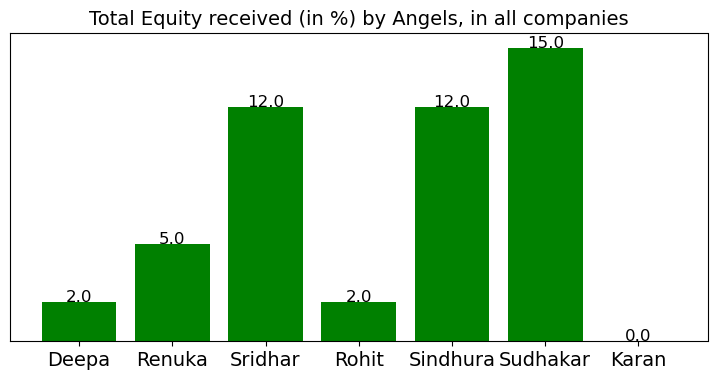

In [33]:
# Equity received by Angels
Equity = [nenu_super_women['Deepa Investment Equity'].sum(), nenu_super_women['Renuka Investment Equity'].sum(), nenu_super_women['Sridhar Investment Equity'].sum(), nenu_super_women['Rohit Investment Equity'].sum(),
    nenu_super_women['Sindhura Investment Equity'].sum(), nenu_super_women['Sudhakar Investment Equity'].sum(), nenu_super_women['Karan Investment Equity'].sum()]
name=['Deepa','Renuka','Sridhar','Rohit','Sindhura','Sudhakar','Karan']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(9,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d, s=f"{round(d,1)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Equity received (in %) by Angels, in all companies", fontsize=14)
plt.show()

In [34]:
# # Maximum Investment - as per Debt/loaned Amount
# print("Maximum Investment - as per Debt/loaned Amount")
# print("Sudhakar gave loan of -", round(max(nenu_super_women['Deepa Debt Amount'].sum()/100, nenu_super_women['Renuka Debt Amount'].sum()/100, nenu_super_women['Sridhar Debt Amount'].sum()/100, nenu_super_women['Rohit Debt Amount'].sum()/100,
#     nenu_super_women['Sindhura Debt Amount'].sum()/100, nenu_super_women['Sudhakar Debt Amount'].sum()/100, nenu_super_women['Karan Debt Amount'].sum()/100),2), "crores")

In [35]:
# # Minimum Investment - as per Debt/loaned Amount
# print("Minimum Investment - as per Debt/loaned Amount")
# print("Karan gave loan of -", round(min(nenu_super_women['Deepa Debt Amount'].sum()/100, nenu_super_women['Renuka Debt Amount'].sum()/100, nenu_super_women['Sridhar Debt Amount'].sum()/100, nenu_super_women['Rohit Debt Amount'].sum()/100,
#     nenu_super_women['Sindhura Debt Amount'].sum()/100, nenu_super_women['Sudhakar Debt Amount'].sum()/100, nenu_super_women['Karan Debt Amount'].sum()/100),2), "crores")

In [36]:
# # Investment based on the  Debt/loaned Amount
# debt = [nenu_super_women['Deepa Debt Amount'].sum(), nenu_super_women['Renuka Debt Amount'].sum(), nenu_super_women['Sridhar Debt Amount'].sum(), nenu_super_women['Rohit Debt Amount'].sum(),
#     nenu_super_women['Sindhura Debt Amount'].sum(), nenu_super_women['Sudhakar Debt Amount'].sum(), nenu_super_women['Karan Debt Amount'].sum()]
# name=['Deepa','Renuka','Sridhar','Rohit','Sindhura','Sudhakar','Karan']
# df = {'Name':name, 'Total debt':debt}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total debt'])
# plt.xticks(fontsize=14)
# plt.yticks([])
# for index,d in enumerate(debt):
#     plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Debt amount (in lakhs) given by Angels", fontsize=14)
# plt.show()

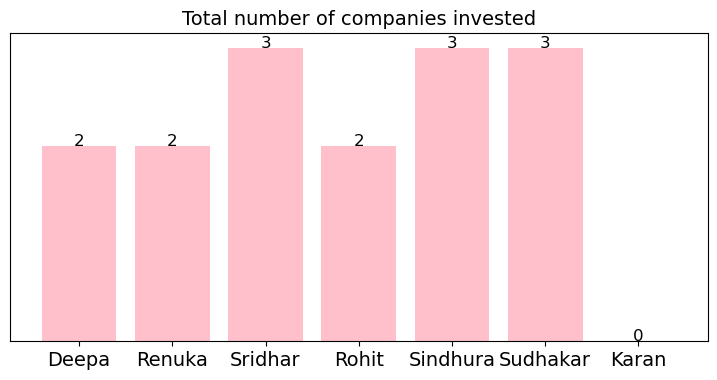

In [37]:
# Number of companies invested
Amount = [nenu_super_women['Deepa Investment Amount'].count(), nenu_super_women['Renuka Investment Amount'].count(), nenu_super_women['Sridhar Investment Amount'].count(), nenu_super_women['Rohit Investment Amount'].count(),
    nenu_super_women['Sindhura Investment Amount'].count(), nenu_super_women['Sudhakar Investment Amount'].count(), nenu_super_women['Karan Investment Amount'].count()]
name=['Deepa','Renuka','Sridhar','Rohit','Sindhura','Sudhakar','Karan']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(9,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested", fontsize=14)
plt.show()

## 📊 BIGG BOSS Dataset https://www.kaggle.com/datasets/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

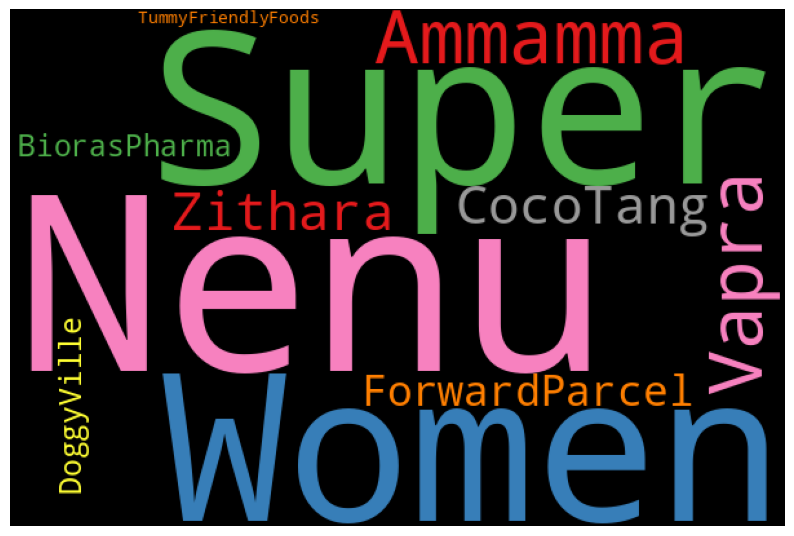

In [38]:
# Word cloud based on Startup Names
text = " Nenu Super Women ".join(cat for cat in nenu_super_women['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=600, height=400, stopwords=stop_words, background_color='black', colormap='Set1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔥 Deepa's Investments

Total investments by Deepa  2
Investment amount by Deepa 0.35 crores
Equity received by Deepa 2.0 % in different companies
Debt/loan amount by Deepa 0.0 crores

Company details:
---------------------------------------------------------------------------
Startup Name            Industry  Deepa Investment Amount
   Ammamma's                Food                     25.0
     Zithara Software/Technology                     10.0
---------------------------------------------------------------------------

Deepa industry wise investments

Food                   1
Software/Technology    1
Name: Industry, dtype: int64


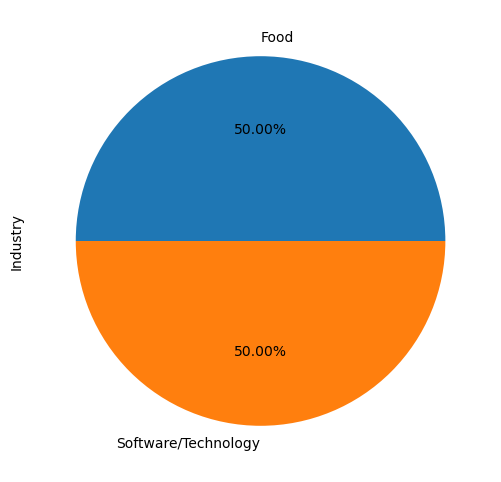

In [39]:
print("Total investments by Deepa", nenu_super_women[nenu_super_women['Deepa Investment Amount']>=0][['Deepa Investment Amount']].count().to_string()[-2:])
print("Investment amount by Deepa", round(nenu_super_women['Deepa Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Deepa", round(nenu_super_women['Deepa Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Deepa", round(nenu_super_women['Deepa Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(nenu_super_women.loc[nenu_super_women['Deepa Investment Amount']>=0][["Startup Name","Industry","Deepa Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDeepa industry wise investments\n")
print(nenu_super_women[nenu_super_women['Deepa Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
nenu_super_women[nenu_super_women['Deepa Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = nenu_super_women.loc[nenu_super_women['Deepa Investment Amount']>=0] [["Startup Name","Deepa Investment Amount","Deepa Investment Equity"]].sort_values(by="Deepa Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Deepa Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 Renuka's Investments

Total investments by Renuka  2
Investment amount by Renuka 0.3 crores
Equity received by Renuka 5.0 % in different companies
Debt/loan amount by Renuka 0.0 crores

Company details:
---------------------------------------------------------------------------
      Startup Name            Industry  Renuka Investment Amount
           Zithara Software/Technology                      10.0
TummyFriendlyFoods                Food                      20.0
---------------------------------------------------------------------------

Renuka industry wise investments

Software/Technology    1
Food                   1
Name: Industry, dtype: int64


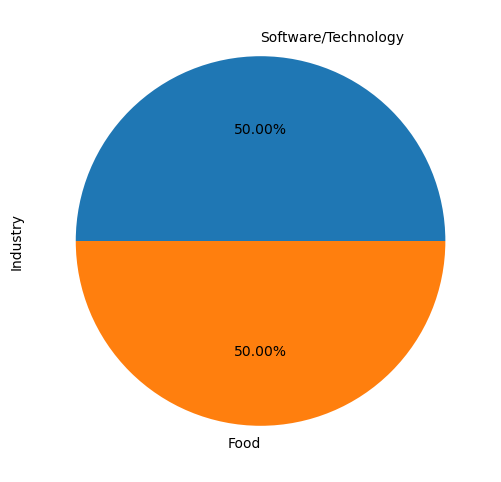

In [40]:
print("Total investments by Renuka", nenu_super_women[nenu_super_women['Renuka Investment Amount']>0][['Renuka Investment Amount']].count().to_string()[-2:])
print("Investment amount by Renuka", round(nenu_super_women['Renuka Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Renuka", round(nenu_super_women['Renuka Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Renuka", round(nenu_super_women['Renuka Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(nenu_super_women.loc[nenu_super_women['Renuka Investment Amount']>0][["Startup Name","Industry","Renuka Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRenuka industry wise investments\n")
print(nenu_super_women[nenu_super_women['Renuka Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
nenu_super_women[nenu_super_women['Renuka Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = nenu_super_women.loc[nenu_super_women['Renuka Investment Amount']>0] [["Startup Name","Renuka Investment Amount","Renuka Investment Equity"]].sort_values(by="Renuka Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Renuka Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ㊂ Sridhar's Investments

Total investments by Sridhar  3
Investment amount by Sridhar 0.6 crores
Equity received by Sridhar 12.0 % in different companies
Debt/loan amount by Sridhar 0.0 crores

Company details:
---------------------------------------------------------------------------
Startup Name            Industry  Sridhar Investment Amount
   Ammamma's                Food                       25.0
     Zithara Software/Technology                       10.0
  DoggyVille        Pets/Animals                       25.0
---------------------------------------------------------------------------

Sridhar industry wise investments

Food                   1
Software/Technology    1
Pets/Animals           1
Name: Industry, dtype: int64


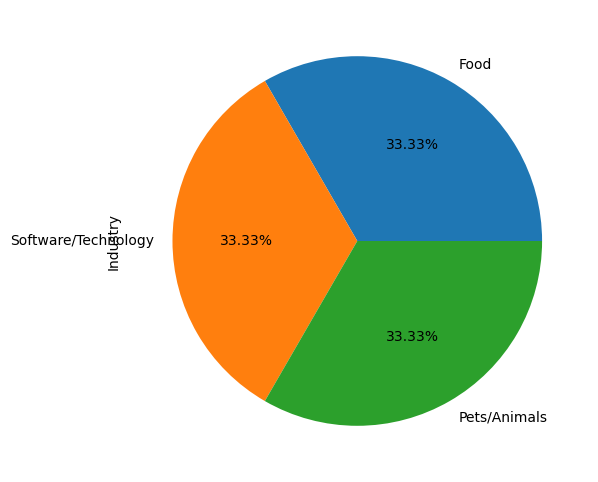

In [41]:
print("Total investments by Sridhar", nenu_super_women[nenu_super_women['Sridhar Investment Amount']>=0][['Sridhar Investment Amount']].count().to_string()[-2:])
print("Investment amount by Sridhar", round(nenu_super_women['Sridhar Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Sridhar", round(nenu_super_women['Sridhar Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Sridhar", round(nenu_super_women['Sridhar Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(nenu_super_women.loc[nenu_super_women['Sridhar Investment Amount']>=0][["Startup Name","Industry","Sridhar Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nSridhar industry wise investments\n")
print(nenu_super_women[nenu_super_women['Sridhar Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
nenu_super_women[nenu_super_women['Sridhar Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = nenu_super_women.loc[nenu_super_women['Sridhar Investment Amount']>=0] [["Startup Name","Sridhar Investment Amount","Sridhar Investment Equity"]].sort_values(by="Sridhar Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Sridhar Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Rohit's Investments

Total investments by Rohit  2
Investment amount by Rohit 0.6 crores
Equity received by Rohit 2.0 % in different companies
Debt/loan amount by Rohit 0.0 crores

Company details:
---------------------------------------------------------------------------
Startup Name            Industry  Rohit Investment Amount
     Zithara Software/Technology                     10.0
BiorasPharma      Medical/Health                     50.0
---------------------------------------------------------------------------

Rohit industry wise investments

Software/Technology    1
Medical/Health         1
Name: Industry, dtype: int64


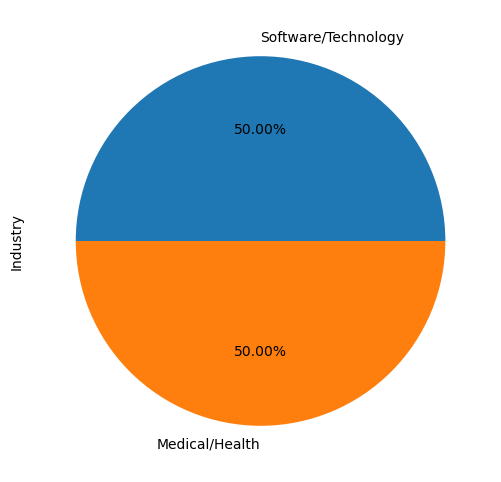

In [42]:
print("Total investments by Rohit", nenu_super_women[nenu_super_women['Rohit Investment Amount']>0][['Rohit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Rohit", round(nenu_super_women['Rohit Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Rohit", round(nenu_super_women['Rohit Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Rohit", round(nenu_super_women['Rohit Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(nenu_super_women.loc[nenu_super_women['Rohit Investment Amount']>0][["Startup Name","Industry","Rohit Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRohit industry wise investments\n")
print(nenu_super_women[nenu_super_women['Rohit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
nenu_super_women[nenu_super_women['Rohit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = nenu_super_women.loc[nenu_super_women['Rohit Investment Amount']>0] [["Startup Name","Rohit Investment Amount","Rohit Investment Equity"]].sort_values(by="Rohit Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Rohit Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Sindhura's Investments

Total investments by Sindhura  3
Investment amount by Sindhura 0.72 crores
Equity received by Sindhura 12.0 % in different companies
Debt/loan amount by Sindhura 0.0 crores

Company details:
---------------------------------------------------------------------------
Startup Name            Industry  Sindhura Investment Amount
       Vapra      Lifestyle/Home                        12.5
     Zithara Software/Technology                        10.0
BiorasPharma      Medical/Health                        50.0
---------------------------------------------------------------------------

Sindhura industry wise investments

Lifestyle/Home         1
Software/Technology    1
Medical/Health         1
Name: Industry, dtype: int64


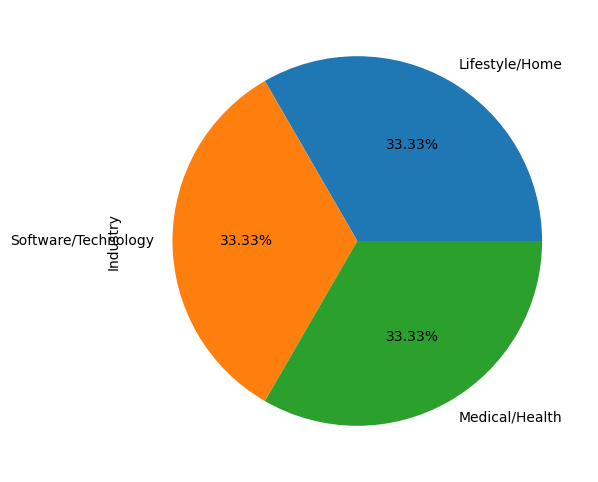

In [43]:
print("Total investments by Sindhura", nenu_super_women[nenu_super_women['Sindhura Investment Amount']>=0][['Sindhura Investment Amount']].count().to_string()[-2:])
print("Investment amount by Sindhura", round(nenu_super_women['Sindhura Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Sindhura", round(nenu_super_women['Sindhura Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Sindhura", round(nenu_super_women['Sindhura Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(nenu_super_women.loc[nenu_super_women['Sindhura Investment Amount']>=0][["Startup Name","Industry","Sindhura Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nSindhura industry wise investments\n")
print(nenu_super_women[nenu_super_women['Sindhura Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
nenu_super_women[nenu_super_women['Sindhura Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = nenu_super_women.loc[nenu_super_women['Sindhura Investment Amount']>=0] [["Startup Name","Sindhura Investment Amount","Sindhura Investment Equity"]].sort_values(by="Sindhura Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Sindhura Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Sudhakar's Investments

Total investments by Sudhakar  3
Investment amount by Sudhakar 0.42 crores
Equity received by Sudhakar 15.0 % in different companies
Debt/loan amount by Sudhakar 0.0 crores

Company details:
---------------------------------------------------------------------------
      Startup Name            Industry  Sudhakar Investment Amount
             Vapra      Lifestyle/Home                        12.5
           Zithara Software/Technology                        10.0
TummyFriendlyFoods                Food                        20.0
---------------------------------------------------------------------------

Sudhakar industry wise investments

Lifestyle/Home         1
Software/Technology    1
Food                   1
Name: Industry, dtype: int64


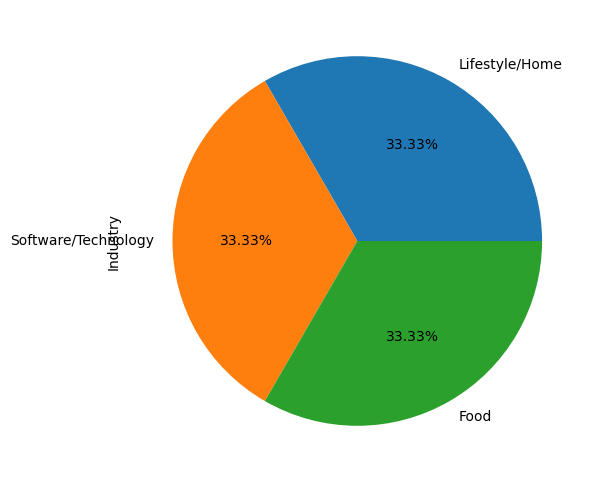

In [44]:
print("Total investments by Sudhakar", nenu_super_women[nenu_super_women['Sudhakar Investment Amount']>=0][['Sudhakar Investment Amount']].count().to_string()[-2:])
print("Investment amount by Sudhakar", round(nenu_super_women['Sudhakar Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Sudhakar", round(nenu_super_women['Sudhakar Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Sudhakar", round(nenu_super_women['Sudhakar Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(nenu_super_women.loc[nenu_super_women['Sudhakar Investment Amount']>=0][["Startup Name","Industry","Sudhakar Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nSudhakar industry wise investments\n")
print(nenu_super_women[nenu_super_women['Sudhakar Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
nenu_super_women[nenu_super_women['Sudhakar Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = nenu_super_women.loc[nenu_super_women['Sudhakar Investment Amount']>=0] [["Startup Name","Sudhakar Investment Amount","Sudhakar Investment Equity"]].sort_values(by="Sudhakar Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Sudhakar Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎯 Karan's Investments

In [45]:
# print("Total investments by Karan", nenu_super_women[nenu_super_women['Karan Investment Amount']>=0][['Karan Investment Amount']].count().to_string()[-2:])
# print("Investment amount by Karan", round(nenu_super_women['Karan Investment Amount'].sum()/100, 2), "crores")
# print("Equity received by Karan", round(nenu_super_women['Karan Investment Equity'].sum(), 2), "% in different companies")
# print("Debt/loan amount by Karan", round(nenu_super_women['Karan Debt Amount'].sum()/100, 2), "crores\n")

# print("Company details:")
# print('-'*75)
# print(nenu_super_women.loc[nenu_super_women['Karan Investment Amount']>0][["Startup Name","Industry","Karan Investment Amount"]].to_string(index=False))
# print('-'*75)

# print("\nKaran industry wise investments\n")
# print(nenu_super_women[nenu_super_women['Karan Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
# plt.figure(figsize = (10,6))
# nenu_super_women[nenu_super_women['Karan Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
# plt.show()

# tmpdf = nenu_super_women.loc[nenu_super_women['Karan Investment Amount']>0] [["Startup Name","Karan Investment Amount","Karan Investment Equity"]].sort_values(by="Karan Investment Equity")
# fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Karan Investment Amount'], width=800, height=800)
# fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
# fig.update_traces(textposition='middle center')
# fig.show()

2.0    4
6.0    1
1.0    1
Name: Number of Angels in deal, dtype: int64 

2.0    67%
6.0    17%
1.0    17%
Name: Number of Angels in deal, dtype: object


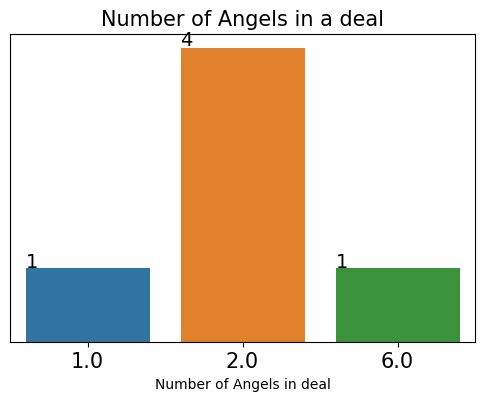

In [46]:
# Number of Angels in a deal
print(nenu_super_women['Number of Angels in deal'].value_counts(), "\n")

# In percentage
print(round(nenu_super_women['Number of Angels in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(6, 4))
plt.title("Number of Angels in a deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = nenu_super_women, x = 'Number of Angels in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01), size=14)

In [47]:
# All Angels deals
print(nenu_super_women.loc[nenu_super_women['Number of Angels in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

   Season Number Startup Name  Total Deal Amount  Total Deal Equity
3              1      Zithara               60.0                6.0


In [48]:
# # Angel with most number of solo deals
# amt_cols = nenu_super_women.columns[nenu_super_women.columns.str.contains('Investment Amount')].tolist()
# tmp = nenu_super_women.loc[nenu_super_women['Number of Angels in deal'] == 1][amt_cols]
# tmp.count().sort_values(ascending=False).nlargest(2)

In [49]:
# Most frequently asked amount, by startups
nenu_super_women.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (in lakhs) and Number times asked

Original Ask Amount
50     3
80     2
25     1
100    1
300    1
dtype: int64

In [50]:
# Most frequently offered equity, by startups
nenu_super_women.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
5     3
2     2
6     1
10    1
20    1
dtype: int64

In [51]:
# Most frequently invested amount, by Angels
nenu_super_women.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (in lakhs) and Number times invested

Total Deal Amount
25.0     2
40.0     1
50.0     1
60.0     1
100.0    1
dtype: int64

In [52]:
# Most frequently received total equity, by Angels
nenu_super_women.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
2.0     2
6.0     1
8.0     1
10.0    1
20.0    1
dtype: int64

In [53]:
# Mostly successful combinations (of asked amount and offered equity)
# nenu_super_women.loc[nenu_super_women['Received Offer'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

In [54]:
# Most frequently asked amount, by startups who could NOT get a deal
nenu_super_women.loc[nenu_super_women['Received Offer'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (in lakhs) and Number times asked (but rejected by Angels)

Original Ask Amount
50    2
dtype: int64

In [55]:
# Most frequently offered equity, by startups who could NOT get a deal
nenu_super_women.loc[nenu_super_women['Received Offer'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by Angels)

Original Offered Equity
5    2
dtype: int64

In [56]:
# Mostly rejected combinations (of asked amount and offered equity)
nenu_super_women.loc[nenu_super_women['Received Offer'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(5)

# If you are pitching in NenuSuperWomen, don't ask for 50 lakhs with 5% equity

Original Ask Amount  Original Offered Equity
50                   5                          2
dtype: int64

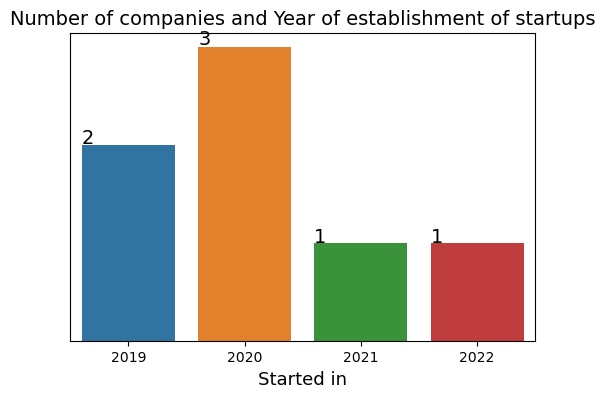

In [57]:
# Startup companies started in year
fig = plt.figure(figsize=(6, 4))
plt.title('Number of companies and Year of establishment of startups', size=14)
tmp = nenu_super_women.loc[nenu_super_women['Started in'].notnull()]
ax = sns.countplot(data = tmp, x = 'Started in')
ax.set_xlabel('Started in', fontsize=13)
plt.yticks([])
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01), size=14)

In [58]:
# No company got more amount than they asked/expected
nenu_super_women.loc[nenu_super_women['Original Ask Amount'] < nenu_super_women["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Empty DataFrame
Columns: [Startup Name, Original Ask Amount, Total Deal Amount]
Index: []

In [59]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
nenu_super_women.loc[nenu_super_women['Original Offered Equity'] < nenu_super_women["Total Deal Equity"]][["Startup Name","Original Offered Equity","Total Deal Equity"]]

Startup Name  Original Offered Equity  Total Deal Equity
1               Vapra                       10               20.0
3             Zithara                        2                6.0
7  TummyFriendlyFoods                        5                8.0

In [60]:
# Below companies got the same valuation they requested
nenu_super_women.loc[nenu_super_women['Valuation Requested'] == nenu_super_women["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name  Valuation Requested  Deal Valuation
5  BiorasPharma                 5000          5000.0

In [61]:
# There is NO company which got more valuation than they pitched
nenu_super_women.loc[nenu_super_women['Valuation Requested'] < nenu_super_women["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Empty DataFrame
Columns: [Startup Name, Valuation Requested, Deal Valuation]
Index: []

In [62]:
# Some companies were on pre-revenue or didn't had any revenue (as of pitching day)
nenu_super_women.loc[nenu_super_women['Yearly Revenue'] == 0]

Season Number Season Start  Season End  Episode Number  Pitch Number  \
5              1    21-Jul-23         NaN               3             6   

   Startup Name        Industry                Business Description  \
5  BiorasPharma  Medical/Health  Manufacture of chemicals &products   

  Company Website Entrepreneur Names  Number of Presenters  \
5             NaN   Rachana Tripathi                     1   

  Pitchers Average Age  Started in  Yearly Revenue  Monthly Sales  \
5               Middle        2021               0            NaN   

   Gross Margin  Net Margin  SKUs  Original Ask Amount  \
5          <NA>        <NA>   NaN                  100   

   Original Offered Equity  Valuation Requested  Received Offer  \
5                        2                 5000               1   

   Accepted Offer  Total Deal Amount  Total Deal Equity  ...  \
5               1              100.0                2.0  ...   

   Investment Amount Per Angel  Equity Per Angel  Deal has conditions  \
5                         50.0               1.0                  Yes   

   Has Patents  Deepa Investment Amount  Deepa Investment Equity  \
5          NaN                      NaN                      NaN   

  Deepa Debt Amount  Renuka Investment Amount  Renuka Investment Equity  \
5               NaN                       NaN                       NaN   

   Renuka Debt Amount  Sridhar Investment Amount  Sridhar Investment Equity  \
5                 NaN                        NaN                        NaN   

   Sridhar Debt Amount  Rohit Investment Amount  Rohit Investment Equity  \
5                  NaN                     50.0                      1.0   

   Rohit Debt Amount  Sindhura Investment Amount  Sindhura Investment Equity  \
5                NaN                        50.0                         1.0   

   Sindhura Debt Amount  Sudhakar Investment Amount  \
5                   NaN                         NaN   

   Sudhakar Investment Equity  Sudhakar Debt Amount  Karan Investment Amount  \
5                         NaN                   NaN                      NaN   

   Karan Investment Equity  Karan Debt Amount  
5                      NaN                NaN  

[1 rows x 54 columns]

In [63]:
# # Some companies were on burning/paying money from their pocket, without any profit (as of pitching day)
# nenu_super_women.loc[nenu_super_women['Yearly Revenue'] < 0]

In [64]:
# Top 3 Highest Yearly Revenue brands
print(nenu_super_women.groupby('Startup Name')['Yearly Revenue'].max().nlargest(3))

tmpdf = nenu_super_women.sort_values('Yearly Revenue', ascending=False)[0:3]
fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue (in lakhs) of participated startups</b>", text=tmpdf['Yearly Revenue'])
fig.show()

Startup Name
Ammamma's             4200
TummyFriendlyFoods     220
ForwardParcel          130
Name: Yearly Revenue, dtype: Int32


In [65]:
# Top 2 highest Gross Margin brands, in all seasons
print(nenu_super_women.groupby('Startup Name')['Gross Margin'].max().nlargest(2))

tmpdf = nenu_super_women.sort_values('Gross Margin', ascending=False)[0:2]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", template='simple_white', title="<b>Highest Gross margin (in %) of the brands</b>", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
Ammamma's        55
ForwardParcel    35
Name: Gross Margin, dtype: Int32


In [66]:
# Top 2 highest Net Margin brands, in all seasons
print(nenu_super_women.groupby('Startup Name')['Net Margin'].max().nlargest(2))

tmpdf = nenu_super_women.sort_values('Net Margin', ascending=False)[0:2]
fig = px.bar(tmpdf, x="Startup Name", y='Net Margin', color="Startup Name", template='simple_white', title="<b>Highest Net margin (in %) of the brands</b>", text=tmpdf['Net Margin'].map(int).map(str) + "%")
fig.show()

Startup Name
ForwardParcel         30
TummyFriendlyFoods    30
Name: Net Margin, dtype: Int32


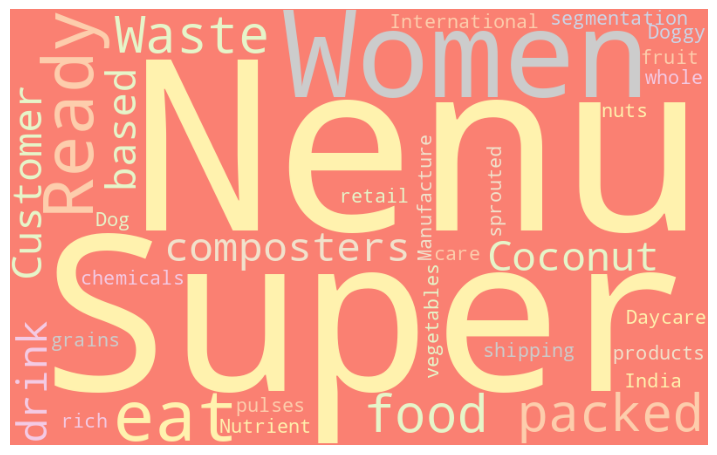

In [67]:
# Word cloud based on Business Description, startups came
text = " Nenu Super Women ".join(cat for cat in nenu_super_women['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=800, height=500, stopwords=stop_words, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(9,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ⭐ Hindi Bigg Boss OTT Season 2
## https://kaggle.com/code/thirumani/predicting-bigg-boss-hindi-ott-season-2-winner

## Kannada Bigg Boss Season10
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-kannada-season-10-winner

## Telugu Bigg Boss Season7
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-telugu-season-7-winner

## Tamil Bigg Boss Season7
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-tamil-season-7-winner

## Malayalam Bigg Boss Season5
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-malayalam-season-5-winner

## Marathi Bigg Boss Season5
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-marathi-season-5-winner

## Bangla Bigg Boss Season3
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-bangla-season-3-winner

In [68]:
# Correlation matrix
nenu_super_women.corr().style.background_gradient(cmap = 'Blues')

In [69]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.23.5
# pandas version: 1.5.3
# matplotlib version: 3.7.2
# seaborn version: 0.12.2
# plotly version: 5.15.0

numpy version: 1.23.5
pandas version: 1.5.3
matplotlib version: 3.7.2
seaborn version: 0.12.2
plotly version: 5.15.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [70]:
nenu_super_women.loc[(nenu_super_women['Accepted Offer'] == 1) & (nenu_super_women['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [71]:
nenu_super_women.loc[(nenu_super_women['Accepted Offer'] == 1) & (nenu_super_women['Number of Angels in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [72]:
nenu_super_women.loc[(nenu_super_women['Accepted Offer'].isnull()) & (nenu_super_women['Number of Angels in deal'] >= 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [73]:
nenu_super_women.loc[round(nenu_super_women['Total Deal Amount'].fillna(0),1) != round(nenu_super_women['Deepa Investment Amount'].fillna(0) + nenu_super_women['Renuka Investment Amount'].fillna(0) + nenu_super_women['Sridhar Investment Amount'].fillna(0) + nenu_super_women['Rohit Investment Amount'].fillna(0) + nenu_super_women['Sindhura Investment Amount'].fillna(0) + nenu_super_women['Sudhakar Investment Amount'].fillna(0) + nenu_super_women['Karan Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [74]:
nenu_super_women.loc[round(nenu_super_women['Total Deal Equity'].fillna(0),1) != round(nenu_super_women['Deepa Investment Equity'].fillna(0) + nenu_super_women['Renuka Investment Equity'].fillna(0) + nenu_super_women['Sridhar Investment Equity'].fillna(0) + nenu_super_women['Rohit Investment Equity'].fillna(0) + nenu_super_women['Sindhura Investment Equity'].fillna(0) + nenu_super_women['Sudhakar Investment Equity'].fillna(0) + nenu_super_women['Karan Investment Equity'].fillna(0),1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [75]:
nenu_super_women.loc[round(nenu_super_women['Total Deal Debt'].fillna(0),1) != round(nenu_super_women['Deepa Debt Amount'].fillna(0) + nenu_super_women['Renuka Debt Amount'].fillna(0) + nenu_super_women['Sridhar Debt Amount'].fillna(0) + nenu_super_women['Rohit Debt Amount'].fillna(0) + nenu_super_women['Sindhura Debt Amount'].fillna(0) + nenu_super_women['Sudhakar Debt Amount'].fillna(0) + nenu_super_women['Karan Debt Amount'].fillna(0),1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [76]:
nenu_super_women.loc[(nenu_super_women['Received Offer'] == 1) & (nenu_super_women['Accepted Offer'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [77]:
nenu_super_women.loc[(nenu_super_women['Received Offer'] == 0) & (nenu_super_women['Accepted Offer'].notnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [78]:
nenu_super_women.loc[nenu_super_women['Number of Angels in deal'].fillna(0).round(0).astype(int) != nenu_super_women['Deepa Investment Amount'].notnull().astype("int") + nenu_super_women['Renuka Investment Amount'].notnull().astype("int") + nenu_super_women['Sridhar Investment Amount'].notnull().astype("int") + nenu_super_women['Rohit Investment Amount'].notnull().astype("int") + nenu_super_women['Sindhura Investment Amount'].notnull().astype("int") + nenu_super_women['Sudhakar Investment Amount'].notnull().astype("int") + nenu_super_women['Karan Investment Amount'].notnull().astype("int")]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [79]:
nenu_super_women.loc[(nenu_super_women['Received Offer'] != 0) & (nenu_super_women['Received Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]

In [80]:
nenu_super_women.loc[(nenu_super_women['Accepted Offer'] != 0) & (nenu_super_women['Accepted Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Startup Name, Industry, Business Description, Company Website, Entrepreneur Names, Number of Presenters, Pitchers Average Age, Started in, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, SKUs, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Angels in deal, Investment Amount Per Angel, Equity Per Angel, Deal has conditions, Has Patents, Deepa Investment Amount, Deepa Investment Equity, Deepa Debt Amount, Renuka Investment Amount, Renuka Investment Equity, Renuka Debt Amount, Sridhar Investment Amount, Sridhar Investment Equity, Sridhar Debt Amount, Rohit Investment Amount, Rohit Investment Equity, Rohit Debt Amount, Sindhura Investment Amount, Sindhura Investment Equity, Sindhura Debt Amount, Sudhakar Investment Amount, Sudhakar Investment Equity, Sudhakar Debt Amount, Karan Investment Amount, Karan Investment Equity, Karan Debt Amount]
Index: []

[0 rows x 54 columns]